In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

In [480]:
X=np.load("X.npy")
y=np.load("Y.npy")

In [181]:
X.shape

(5547, 50, 50, 3)

In [182]:
y.shape

(5547,)

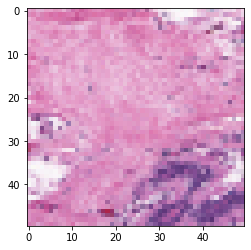

In [183]:
plt.imshow(X[0])

In [184]:
rand=random.choice(tf.range(0,len(X)))
def random_pics(rand):
    plt.imshow(X[rand],cmap=plt.cm.binary)

In [185]:

def random_pics1():
    rand=random.choice(tf.range(0,len(X)))
    rand2=random.randint(0,len(X))
    rand3=random.randint(0,len(X))
    fig,ax=plt.subplots(1,3,figsize=(15,26))
    ax[0].imshow(X[rand])
    ax[0].set_title(f"Drawing of breast histology {X[rand].argmax()} ")
    ax[1].imshow(X[rand2])
    ax[1].set_title(f"Drawing of breast histology {X[rand2].argmax()}")
    ax[2].imshow(X[rand3])
    ax[2].set_title(f"Drawing of breast histology {X[rand3].argmax()}")

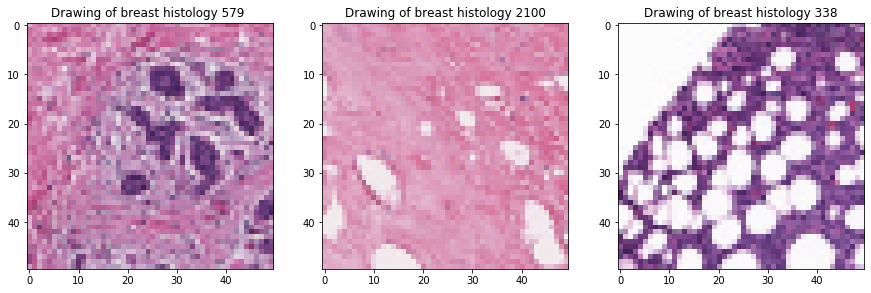

In [186]:
#Create random images of breast histologies
random_pics1()

In [187]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [188]:
np.unique(y)

array([0, 1], dtype=int64)

In [189]:
X.shape,y.shape

((5547, 50, 50, 3), (5547,))

In [190]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [191]:
print(f"X train shape : {Xtrain.shape}")
print(f"X test shape : {Xtest.shape}")
print(f"y train shape : {ytrain.shape}")
print(f"y test shape : {ytest.shape}")

X train shape : (4160, 50, 50, 3)
X test shape : (1387, 50, 50, 3)
y train shape : (4160,)
y test shape : (1387,)


Now,we want to normalize our data

In [192]:
Xtrain.min(),Xtrain.max()

(2, 255)

In [193]:
Xtest.min(),Xtest.max()

(2, 255)

In [194]:
Xtrain_norm=Xtrain/255.0
Xtest_norm=Xtest/255.0

In [195]:
Xtrain_norm.min(),Xtrain_norm.max()

(0.00784313725490196, 1.0)

In [196]:
ytrain.min(),ytest.max()

(0, 1)

In [197]:
Xtrain_norm.shape


(4160, 50, 50, 3)

### MODEL BUILDING 

In [198]:
Xtrain_norm=Xtrain_norm.reshape(4160,50*50*3)

In [199]:
Xtest_norm=Xtest_norm.reshape(1387,50*50*3)

In [200]:
Xtrain_norm.shape,Xtest_norm.shape

((4160, 7500), (1387, 7500))

In [201]:
ytrain.shape,ytest.shape

((4160,), (1387,))

In [225]:
#NORMALIZED DATA MODEL
#Random seed
tf.random.set_seed(42)
#Build the model
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50,3)), #Input shape for one image
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])
#Fit the model
history1=model1.fit(Xtrain_norm,ytrain,epochs=50,validation_data=(Xtest_norm,ytest))

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5233 - val_loss: 0.6867 - val_accuracy: 0.5191
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4927 - val_loss: 0.6846 - val_accuracy: 0.5342
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5276 - val_loss: 0.6748 - val_accuracy: 0.5263
Epoch 4/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5573 - val_loss: 0.6754 - val_accuracy: 0.6164
Epoch 5/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6368 - val_loss: 0.6774 - val_accuracy: 0.5833
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.5993 - val_loss: 0.6353 - val_accuracy: 0.6878
Epoch 7/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.6631 - val_loss: 0.6414 - val_accuracy: 0.6049
Epoch 

In [232]:
#NON NORMALIZED DATA MODEL
#Random seed
tf.random.set_seed(42)
#Build the model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50,3)), #Input shape for one image
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])
#Fit the model
history_nonnorm=model.fit(Xtrain,ytrain,epochs=50,validation_data=(Xtest,ytest))

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 2322.4735 - accuracy: 0.5258 - val_loss: 0.6929 - val_accuracy: 0.4816
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.4816
Epoch 3/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5176 - val_loss: 0.6932 - val_accuracy: 0.4816
Epoch 4/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4908 - val_loss: 0.6935 - val_accuracy: 0.4816
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5086 - val_loss: 0.6936 - val_accuracy: 0.4816
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5132 - val_loss: 0.6936 - val_accuracy: 0.4816
Epoch 7/50
130/130 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6936 - val_accuracy: 0.4816
Epo

In [228]:
hist_df=pd.DataFrame(history1.history)

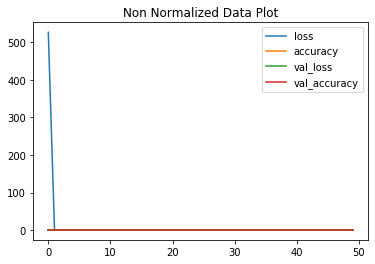

In [236]:
pd.DataFrame(history_nonnorm.history).plot(title="Non Normalized Data Plot")

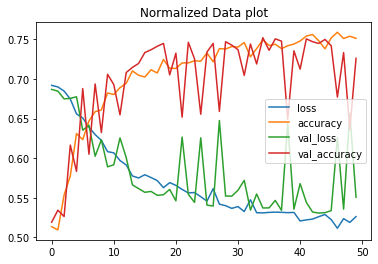

In [237]:
hist_df.plot(title="Normalized Data plot")

Text(0, 0.5, 'Accuracy')

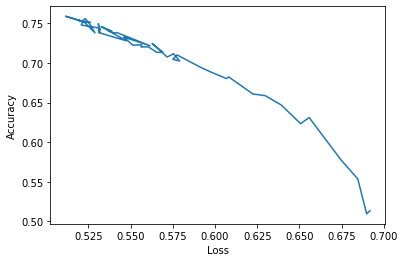

In [231]:
plt.plot(hist_df["loss"],hist_df["accuracy"])
plt.xlabel("Loss")
plt.ylabel("Accuracy")

### FINDING THE IDEAL LEARNING RATE

In [243]:
#NORMALIZED DATA MODEL finding learning rate
#Random seed
tf.random.set_seed(42)
#Build the model
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50,3)), #Input shape for one image
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

#Create learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))

#Fit the model
history2=model2.fit(Xtrain_norm,ytrain,epochs=100,validation_data=(Xtest_norm,ytest),callbacks=[lr_scheduler])

Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.4862 - val_loss: 0.6938 - val_accuracy: 0.4780
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5126 - val_loss: 0.6931 - val_accuracy: 0.4809
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5175 - val_loss: 0.6923 - val_accuracy: 0.4816
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4914 - val_loss: 0.6961 - val_accuracy: 0.4809
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5274 - val_loss: 0.6975 - val_accuracy: 0.4816
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5800 - val_loss: 0.6855 - val_accuracy: 0.5155
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6158 - val_loss: 0.6694 - val_accuracy: 0.6792

In [246]:
lrs.shape

TensorShape([40])

In [251]:
np.array(history2.history["loss"]).shape

(100,)

Text(0.5, 1.0, 'Finding the ideal learning rate')

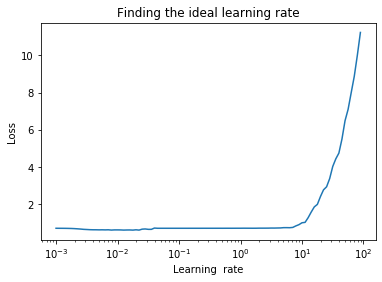

In [252]:
#Plot the learning rate decay curve
lrs=1e-3*10**(tf.range(100)/20)
plt.semilogx(lrs,history2.history["loss"])
plt.xlabel("Learning  rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [255]:
#This seems like the ideal learning rate
10**-2

0.01

#### TRYING MORE THINGS IN OUR BEST MODEL 

In [290]:
#NORMALIZED DATA MODEL
#Random seed
tf.random.set_seed(42)
#Build the model
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50,50,3)), #Input shape for one image
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#Compile the model
model3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])
#Fit the model
history3=model3.fit(Xtrain_norm,ytrain,epochs=149,validation_data=(Xtest_norm,ytest))

Epoch 1/149
130/130 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5075 - val_loss: 0.6829 - val_accuracy: 0.5220
Epoch 2/149
130/130 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6109 - val_loss: 0.6723 - val_accuracy: 0.6575
Epoch 3/149
130/130 [==============================] - 1s 6ms/step - loss: 0.6746 - accuracy: 0.6373 - val_loss: 0.6614 - val_accuracy: 0.6402
Epoch 4/149
130/130 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6487 - val_loss: 0.6631 - val_accuracy: 0.6273
Epoch 5/149
130/130 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6928 - val_loss: 0.6652 - val_accuracy: 0.5415
Epoch 6/149
130/130 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6771 - val_loss: 0.6402 - val_accuracy: 0.6936
Epoch 7/149
130/130 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6962 - val_loss: 0.6234 - val_accuracy: 0.6979

Epoch 107/149
130/130 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7792 - val_loss: 0.5208 - val_accuracy: 0.7505
Epoch 108/149
130/130 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.7784 - val_loss: 0.5188 - val_accuracy: 0.7592
Epoch 109/149
130/130 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7827 - val_loss: 0.5343 - val_accuracy: 0.7455
Epoch 110/149
130/130 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7710 - val_loss: 0.5710 - val_accuracy: 0.7210
Epoch 111/149
130/130 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7769 - val_loss: 0.5220 - val_accuracy: 0.7520
Epoch 112/149
130/130 [==============================] - 1s 5ms/step - loss: 0.4613 - accuracy: 0.7761 - val_loss: 0.5494 - val_accuracy: 0.7462
Epoch 113/149
130/130 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7795 - val_loss: 0.5556 - val_ac

In [263]:
model1.evaluate(Xtest_norm,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7260


[0.5505127906799316, 0.7260273694992065]

In [291]:
model3.evaluate(Xtest_norm,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7635


[0.5260874032974243, 0.7635183930397034]

Trying other modelsssssssss

Settling for model 3

### WORKING ON MODEL 3

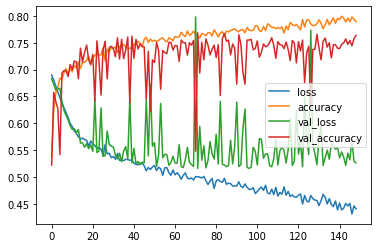

In [292]:
pd.DataFrame(history3.history).plot()

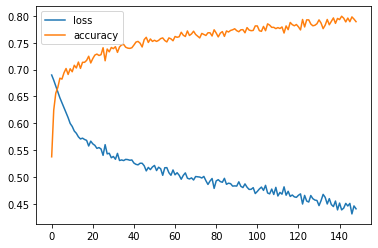

In [294]:
hist_3=pd.DataFrame(history3.history)
hist_3[["loss","accuracy"]].plot()

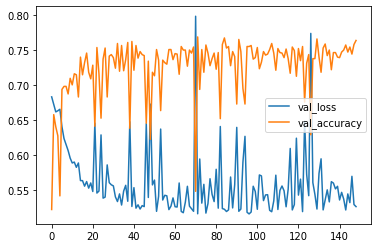

In [295]:
hist_3[["val_loss","val_accuracy"]].plot()

In [296]:
model3.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_74 (Flatten)         (None, 7500)              0         
_________________________________________________________________
dense_241 (Dense)            (None, 10)                75010     
_________________________________________________________________
dense_242 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_243 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_244 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 101       
Total params: 96,411
Trainable params: 96,411
Non-trainable params: 0
_________________________________________________

### MODEL EVALUATION

In [321]:
from sklearn.metrics import confusion_matrix
ypred=model3.predict(Xtest_norm).round()

In [326]:
ypred.shape,ytest.shape

((1387, 1), (1387,))

In [360]:
true_pred=pd.DataFrame({"Ypred":tf.squeeze(ypred),"ytest":ytest})
true_pred.head(50)

,Ypred,ytest
0,0.0,0
1,1.0,0
2,0.0,1
3,1.0,0
4,1.0,1
5,0.0,0
6,1.0,1
7,0.0,0
8,0.0,1
9,0.0,0


In [361]:
true_pred.ytest.value_counts()

0    720
1    667
Name: ytest, dtype: int64

In [331]:
mat=confusion_matrix(ypred,ytest)


In [333]:
mat

array([[538, 146],
       [182, 521]], dtype=int64)

Text(0.5, 1, 'Confusion matrix for Classification of cancerous images')

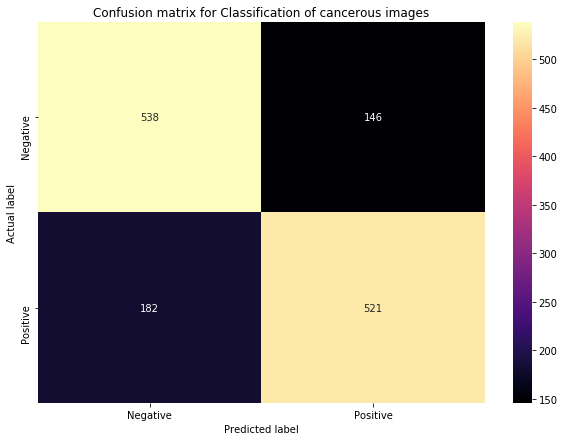

In [348]:
plt.figure(figsize=(10,7))
sns.heatmap(mat,annot=True,cbar=True,fmt='d',cmap="magma",xticklabels=["Negative","Positive"],yticklabels=["Negative","Positive"])
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion matrix for Classification of cancerous images")

### VISUALIZING THE ACTUAL VS  PREDICTED VALUES

In [355]:
Xtest_norm

array([[0.85882353, 0.44705882, 0.58039216, ..., 0.78431373, 0.58039216,
        0.71764706],
       [0.74509804, 0.53333333, 0.67058824, ..., 0.78039216, 0.52941176,
        0.64705882],
       [0.8745098 , 0.63137255, 0.74117647, ..., 0.81960784, 0.60392157,
        0.71764706],
       ...,
       [0.84313725, 0.82745098, 0.82745098, ..., 0.85882353, 0.81960784,
        0.85882353],
       [0.70980392, 0.44313725, 0.61960784, ..., 0.83529412, 0.61568627,
        0.7372549 ],
       [0.87843137, 0.70980392, 0.8       , ..., 0.78823529, 0.55294118,
        0.71372549]])

In [367]:
model3.predict(Xtest_norm).round()

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [359]:
ytest[:50]

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1], dtype=int64)

In [446]:
names=["Non Cancerous cell","IDC Cancerous cell"]

In [471]:
def plotting_function(model,true_class,pred_class,name,true_label):
    ran=random.randint(0,len(true_class))
    ran2=random.randint(0,len(true_class))
    ran3=random.randint(0,len(true_class))
    pred_class=model.predict(true_class)
    fig,ax=plt.subplots(1,3,figsize=(20,10))
    ax[0].imshow(true_class.reshape(1387,50,50,3)[ran])
    ax[0].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran]]}\n True label:{name[true_label[ran]]}")
    ax[1].imshow(true_class.reshape(1387,50,50,3)[ran2])
    ax[1].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran2]]},\n True label:{name[true_label[ran2]]}")
    ax[2].imshow(true_class.reshape(1387,50,50,3)[ran3])
    ax[2].set_title(f"Our model predicted: {name[tf.squeeze(model.predict(true_class).round().astype(int)).numpy().tolist()[ran3]]},\n True label:{name[true_label[ran3]]}")

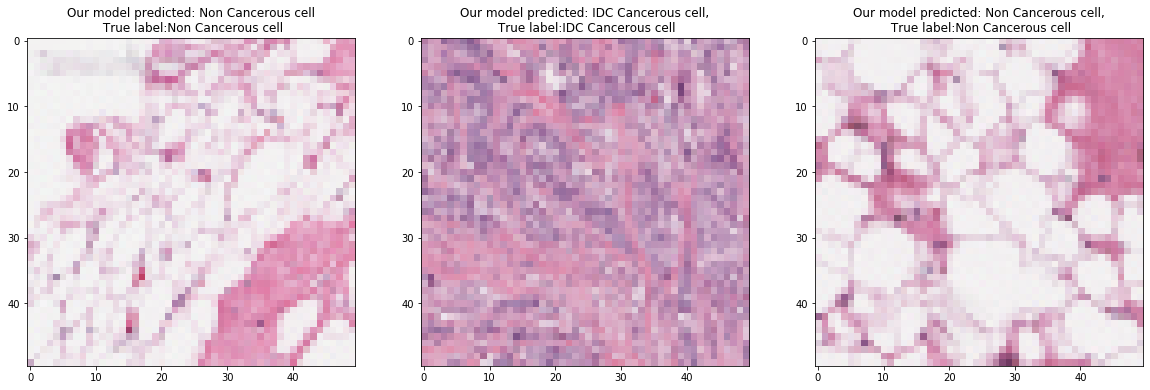

In [497]:
%matplotlib inline
plotting_function(model3,Xtest_norm,ypred,names,ytest)